# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


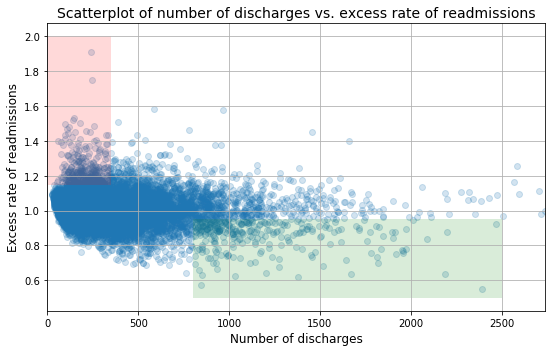

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I agree that there is a trend between "number of discharges" and "excess readmission ratio" but the analysis was not statistical. Therefore, more robust 
analysis and statistica inference should be done to draw abetter conclusion.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the csv file as a dataframe
hospital=pd.read_csv('data/cms_hospital_readmissions.csv')
#Get some basic info
hospital.info()
hospital.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [4]:
#Print first 5 rows
hospital.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


The column 'Number of Discharges' did not show up in the describe() section which means it's not all numerical. We need to get more information

In [5]:
hospital['Number of Discharges'].value_counts(ascending=False).head(10)

Not Available    5282
0                  81
172                45
111                40
119                39
137                39
110                37
126                36
92                 36
193                35
Name: Number of Discharges, dtype: int64

In [6]:
#We need to get rid of the "Not Available" rows to make the data frame easier to work with
hospital_clean=hospital[hospital['Number of Discharges']!='Not Available']
#Get 'Number of Discharges' and 'Excee Readmission Ratio' columns into a new data frame
dis_readm=hospital_clean.loc[:, ['Number of Discharges', 'Excess Readmission Ratio']]
dis_readm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 16857
Data columns (total 2 columns):
Number of Discharges        11578 non-null object
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), object(1)
memory usage: 271.4+ KB


In [7]:
#Convert "Number of Discharges" column to numeric
dis_readm['Number of Discharges']=pd.to_numeric(dis_readm['Number of Discharges'])
#Drop NA values in the "Excess Readmission Ratio" column
dis_readm.dropna(inplace=True)
dis_readm.info()
dis_readm.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


,Number of Discharges,Excess Readmission Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


This data frame looks much better to work with and also provide relevant information for the statistical analysis. We can first try to see if there is any
correlation between these two factors by looking at their Pearson Correlation Coefficient.

In [47]:
Pear_coef=np.corrcoef(dis_readm['Number of Discharges'], dis_readm['Excess Readmission Ratio'])
print('Pearson correlation coefficient is: ', Pear_coef[0,1])

Pearson correlation coefficient is:  -0.0973979435108


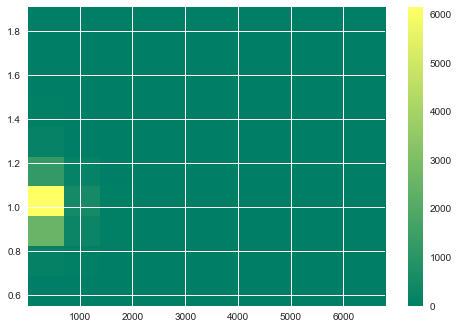

In [33]:
#make a 2D histogram or hex plot to see if there is any correlation
disch=np.array(dis_readm['Number of Discharges'])
readmis=np.array(dis_readm['Excess Readmission Ratio'])
plt.hist2d(x=disch, y=readmis, cmap='summer')
plt.colorbar()
plt.show()

From the above 2D histogram, we can see that in hospitals with less than ~600 discharges, there is a high readmission ratio, whereas in hospitals with large
discharges, the readmission ratio is low. We can extract data where discharges <600 and also discharges>1000. Calculate the mean of each data set and
do statistical test to see if there is a significant difference

In [36]:
dis_less_600=np.array(dis_readm[dis_readm['Number of Discharges']<600].loc[:, 'Excess Readmission Ratio'])
dis_more_1000=np.array(dis_readm[dis_readm['Number of Discharges']>1000].loc[:, 'Excess Readmission Ratio'])
mean_less_600=np.mean(dis_less_600)
mean_more_1000=np.mean(dis_more_1000)
print('mean when discharge < 600: ', mean_less_600)
print('mean when discharge >1000: ', mean_more_1000)

mean when discharge < 600:  1.01000089663
mean when discharge >1000:  0.978335421166


These two mean values are very close. To see if they are actually statistically different, we can perform some tests. First take a look at their distributions

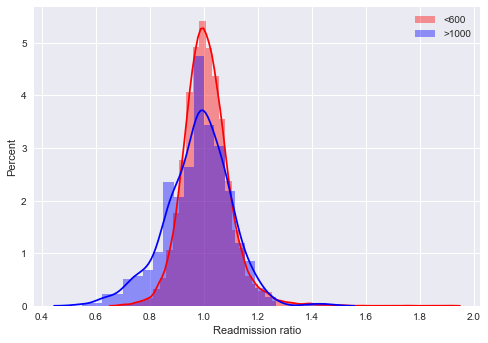

In [44]:
sns.distplot(dis_less_600, label='<600', color='red')
sns.distplot(dis_more_1000, label='>1000', color='blue')
plt.xlabel('Readmission ratio')
plt.ylabel('Percent')
plt.legend()
plt.show()

From the above distributions, they don't completely overlap. When discharge >1000, it has a flatter tail on the left so maybe there is a significant difference.
We can perform test of the mean difference by bootstrapping the 2 data sets.<br>
<br>To state our <b>null hypothesis</b>: the two sample means are actually the same. <br>
<br><b>alternative hypothesis</b>: the two sample means are not the same

In [48]:
#Calculate the mean difference
mean_diff=mean_less_600-mean_more_1000
#Initiate an empty array to hold our test statistic
mean_diff_rep=np.empty(10000)
dis_both=np.concatenate((dis_less_600, dis_more_1000))
for i in range(10000):
    #Bootstrapping the combined data set
    dis_both_rep=np.random.choice(dis_both, len(dis_both))
    #Reassign the bootstrapped data to each set 
    dis_less_600_rep=dis_both_rep[:len(dis_less_600)]
    dis_more_1000_rep=dis_both_rep[len(dis_less_600):]
    mean_diff_rep[i]=np.mean(dis_less_600_rep)-np.mean(dis_more_1000_rep)
p_val=np.sum(mean_diff_rep[mean_diff_rep>mean_diff])/10000
print('The p value is: ', p_val)

The p value is:  0.0


In [49]:
#Report 99% confidence levels (alpha=0.01)
print('The 99% confidence levels are:, ', np.percentile(mean_diff_rep, [0.05, 99.5]))

The 99% confidence levels are:,  [-0.01529981  0.01094113]


The p value is 0 which mean it's very small so we can <b>reject</b> our null hypothesis. There is a statistically significant difference between the two means.
However, the practical difference is very small. I would recommend to the client that to increase care quality for both small and large hospitals. For small
hospitals maybe increase capacity so that patients don't have to be discharged before they complete all necessary treatment.